In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import osmnx as ox

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
block = gpd.read_file('/home/edgar/SIG/Info_Grl/Info_Sociodemografica/Censo/2020/CntMnzCPyV_AMG_INEGI20_UTM_v1.shp', driver='ESRIShapefile')
print(block.shape)
block.head(2)

(60121, 239)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,field_1,ENTIDAD,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCIN,VPH_SINTIC,geometry
0,1400900690031005,14,009,0069,0031,005,Rural,Típica,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (643034.793 2291337.416)
1,1400900060243020,14,009,0006,0243,020,Urbana,Típica,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (642012.719 2294073.386)


In [3]:
block.columns = map(str.lower, block.columns)

In [4]:
block.columns.to_list()

['cvegeo',
 'cve_ent',
 'cve_mun',
 'cve_loc',
 'cve_ageb',
 'cve_mza',
 'ambito',
 'tipomza',
 'field_1',
 'entidad',
 'nom_ent',
 'mun',
 'nom_mun',
 'loc',
 'nom_loc',
 'ageb',
 'mza',
 'pobtot',
 'pobfem',
 'pobmas',
 'p_0a2',
 'p_0a2_f',
 'p_0a2_m',
 'p_3ymas',
 'p_3ymas_f',
 'p_3ymas_m',
 'p_5ymas',
 'p_5ymas_f',
 'p_5ymas_m',
 'p_12ymas',
 'p_12ymas_f',
 'p_12ymas_m',
 'p_15ymas',
 'p_15ymas_f',
 'p_15ymas_m',
 'p_18ymas',
 'p_18ymas_f',
 'p_18ymas_m',
 'p_3a5',
 'p_3a5_f',
 'p_3a5_m',
 'p_6a11',
 'p_6a11_f',
 'p_6a11_m',
 'p_8a14',
 'p_8a14_f',
 'p_8a14_m',
 'p_12a14',
 'p_12a14_f',
 'p_12a14_m',
 'p_15a17',
 'p_15a17_f',
 'p_15a17_m',
 'p_18a24',
 'p_18a24_f',
 'p_18a24_m',
 'p_15a49_f',
 'p_60ymas',
 'p_60ymas_f',
 'p_60ymas_m',
 'rel_h_m',
 'pob0_14',
 'pob15_64',
 'pob65_mas',
 'prom_hnv',
 'pnacent',
 'pnacent_f',
 'pnacent_m',
 'pnacoe',
 'pnacoe_f',
 'pnacoe_m',
 'pres2015',
 'pres2015_f',
 'pres2015_m',
 'presoe15',
 'presoe15_f',
 'presoe15_m',
 'p3ym_hli',
 'p3ym_hli_

<AxesSubplot:>

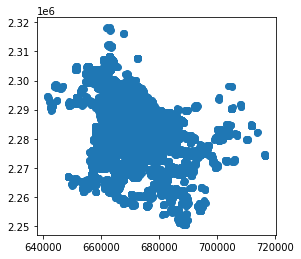

In [5]:
block.plot()

In [6]:
hex_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/Hexbins_AMG_AnalisisVivienda_OC22_UTM_v1.geojson', driver='GeoJSON')
hex_gdf = hex_gdf.to_crs("EPSG:32613")
print(hex_gdf.shape)
hex_gdf.head(2)

(3893, 252)


,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,PromOcupViv,Expc_Ocup,Expc_Dens,DifDens_Exp_Real,Std_DensExpReal,Z_DifViv10_20,R_VivDes_20,Z_RVivDes20,C_RVivDes_10_20,geometry
0,8849aa2689fffff,14002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((649624.983 2260594.873, 649687.178 2..."
1,8849aa268bfffff,14002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((649031.188 2261400.109, 649093.390 2..."


<AxesSubplot:>

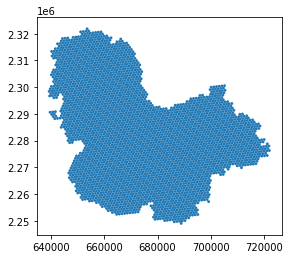

In [7]:
hex_gdf.plot()

In [8]:
hex_gdf = hex_gdf[['hex_id_8','geometry']].copy()
print(hex_gdf.shape)
hex_gdf.head(2)

(3893, 2)


,hex_id_8,geometry
0,8849aa2689fffff,"POLYGON ((649624.983 2260594.873, 649687.178 2..."
1,8849aa268bfffff,"POLYGON ((649031.188 2261400.109, 649093.390 2..."


In [9]:
avg_column = [
    "prom_hnv",
    "graproes",
    "graproes_f",
    "graproes_m",
    "prom_ocup",
    "pro_ocup_c",
]
# sum data for weighted averaged
avg_dict = {
    "prom_hnv": "pobtot",
    "graproes": "pobtot",
    "graproes_f": "pobfem",
    "graproes_m": "pobmas",
    "prom_ocup": "tvivparhab",
    "pro_ocup_c": "tvivparhab",
}

string_columns = [
    'cvegeo',
    'cve_ent',
    'cve_mun',
    'cve_loc',
    'cve_ageb',
    'cve_mza',
    'ambito',
    'tipomza',
    'field_1',
    'entidad',
    'nom_ent',
    'mun',
    'nom_mun',
    'loc',
    'nom_loc',
    'ageb',
    'mza'
]

column_start = 16
column_end = len(block)-1

In [10]:
hex_pop = aup.socio_points_to_polygon(hex_gdf, block,'hex_id_8',
                                       string_columns,
                                       wgt_dict=avg_dict,
                                       avg_column=avg_column)

In [11]:
print(hex_pop.shape)
hex_pop.head(5)

(1438, 222)


,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincin,vph_sintic,hex_id_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8849ab4001fffff
0,19049.0,9679.0,9350.0,793.0,287.0,316.0,18170.0,9269.0,8899.0,17458.0,...,4277.0,3198.0,2161.0,1048.0,734.0,-37.0,-25.0,1139.0,-8.0,88498c942dfffff
0,14114.0,7220.0,6891.0,542.0,206.0,210.0,13502.0,6914.0,6587.0,12986.0,...,3340.0,2432.0,1615.0,824.0,538.0,-30.0,21.0,982.0,-11.0,88498c973bfffff
0,12001.0,6311.0,5669.0,236.0,41.0,53.0,11656.0,6147.0,5505.0,11381.0,...,3516.0,2894.0,1884.0,1267.0,697.0,-8.0,8.0,652.0,-12.0,88498c96abfffff
0,9585.0,4913.0,4660.0,282.0,88.0,108.0,9222.0,4744.0,4474.0,8906.0,...,2462.0,2047.0,1419.0,934.0,524.0,-24.0,-16.0,367.0,-9.0,88498c95dbfffff


In [12]:
hex_pop.pobtot.sum()

5095146.0

In [13]:
hex_mrg = hex_gdf.merge(hex_pop, on='hex_id_8')

In [14]:
hex_mrg['dens_pobha'] = hex_mrg.pobtot / (hex_mrg.area / 10000)

<AxesSubplot:>

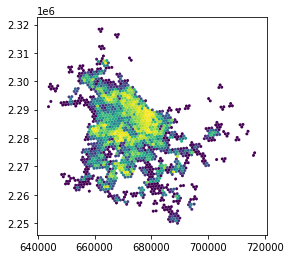

In [15]:
hex_mrg.plot('dens_pobha', 'viridis')

In [16]:
block_10 = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/CntMnz_AnalisisVivienda_INEGI10_UTM_v2.shp', driver='ESRIShapefile')
print(block_10.shape)
block_10.head(2)

(46290, 8)


,CVEGEO,10_pobtot,10_vivtot,10_tvivpar,10_vivpar_,10_ocupviv,10_prom_oc,geometry
0,1403000030177021,13,3,*,*,13,4.33,POINT (695361.391 2256355.831)
1,1403000030177026,167,45,*,*,167,4.28,POINT (694580.146 2256077.440)


In [17]:
block_10.rename(columns={
    '10_tvivpar':'10_tvivparhab',
    '10_vivpar_':'10_vivpar_des',
    '10_prom_oc':'10_prom_ocup'
}, inplace=True)

In [20]:
block_10.replace('*',0, inplace=True)
block_10.replace(-6,0, inplace=True)
block_10.replace(-8,0, inplace=True)
block_10.replace(-9,0, inplace=True)
block_10.replace('N/D', inplace=True)

TypeError: No matching signature found

In [21]:
block_10['10_vivtot'] = block_10['10_vivtot'].astype('float')
block_10['10_tvivparhab'] = block_10['10_tvivparhab'].astype('float')
block_10['10_vivpar_des'] = block_10['10_vivpar_des'].astype('float')
block_10['10_ocupviv'] = block_10['10_ocupviv'].astype('float')
block_10['10_prom_ocup'] = block_10['10_prom_ocup'].astype('float')

In [22]:
block_10['10_tvivparhab'] = block_10['10_pobtot'].loc[block_10['10_prom_ocup']>0] / block_10['10_prom_ocup'].loc[block_10['10_prom_ocup']>0]
block_10['10_vivpar_des'] = block_10['10_vivtot'] - block_10['10_tvivparhab']

In [23]:
avg_column = [
    "10_prom_ocup",
]
# sum data for weighted averaged
avg_dict = {
    "10_prom_ocup": "10_tvivparhab",
}

string_columns = [
    'CVEGEO',
]

column_start = 1
column_end = len(block_10)-1

In [24]:
hex_pop = aup.socio_points_to_polygon(hex_gdf, block_10,'hex_id_8',
                                       string_columns,
                                       wgt_dict=avg_dict,
                                       avg_column=avg_column)
print(hex_pop.shape)
hex_pop.head(5)

(987, 7)


,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupviv,10_prom_ocup,hex_id_8
0,326.0,104.0,81.048027,20.951981,324.0,3.99763,8849aa2b35fffff
0,12156.0,3660.0,3230.029541,428.970398,12035.0,3.762504,88498c94c5fffff
0,13953.0,3480.0,3116.593018,355.407227,13828.0,4.467699,88498c94e9fffff
0,11388.0,3476.0,3085.590332,379.409668,11081.0,3.684546,88498c94c9fffff
0,9789.0,3198.0,2869.935547,328.064545,9440.0,3.410878,88498c94cdfffff


In [25]:
hex_pop['10_pobtot'].sum()

4359274.0

In [32]:
hex_mrg_10_20 = hex_mrg.merge(hex_pop, on='hex_id_8', how='left')

In [37]:
hex_mrg.shape

(1438, 224)

In [33]:
hex_mrg_10_20.shape

(1438, 230)

In [34]:
print(hex_mrg_10_20.shape)
hex_mrg_10_20.head(2)

(1438, 230)


,hex_id_8,geometry,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,vph_sinltc,vph_sincin,vph_sintic,dens_pobha,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupviv,10_prom_ocup
0,88498c9461fffff,"POLYGON ((678635.955 2287401.427, 678104.563 2...",15218.0,7893.0,7312.0,461.0,150.0,166.0,14674.0,7632.0,...,16.0,955.0,-11.0,174.335918,17312.0,4366.0,3924.322021,434.677856,16973.0,4.403563
1,88498c96b5fffff,"POLYGON ((670132.637 2291099.433, 669663.238 2...",5976.0,3204.0,2765.0,83.0,36.0,18.0,5832.0,3130.0,...,-11.0,90.0,-3.0,68.437102,6362.0,2187.0,1981.187988,203.812119,5923.0,3.20969


In [35]:
hex_mrg_10_20['10_dens_pobha'] = hex_mrg_10_20['10_pobtot'] / (hex_mrg_10_20.area / 10000)

<AxesSubplot:>

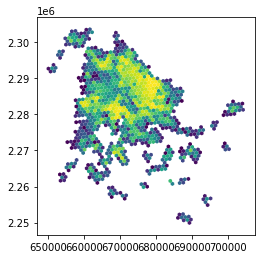

In [36]:
hex_mrg_10_20.plot('10_dens_pobha', 'viridis')

In [60]:
hex_mrg_10_20['T_Viv_10_20'] = hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['R_TViv_10_20'] = (hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']) / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['T_VivDes_10_20'] = hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['R_TVivDes_10_20'] = (hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']) / hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['Z_RTVivDes_10_20'] = (hex_mrg_10_20['R_TVivDes_10_20']-hex_mrg_10_20['R_TVivDes_10_20'].mean()) / hex_mrg_10_20['R_TVivDes_10_20'].std()
hex_mrg_10_20['Z_RTViv_10_20'] = (hex_mrg_10_20['R_TViv_10_20']-hex_mrg_10_20['R_TViv_10_20'].mean()) / hex_mrg_10_20['R_TViv_10_20'].std()
hex_mrg_10_20['R_VivHab_20'] = hex_mrg_10_20['tvivparhab'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['Z_RVivHab_20'] = (hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_20'].mean()) / hex_mrg_10_20['R_VivHab_20'].std()
hex_mrg_10_20['R_VivHab_10'] = hex_mrg_10_20['10_tvivparhab'] / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['Z_RVivHab_10'] = (hex_mrg_10_20['R_VivHab_10'] - hex_mrg_10_20['R_VivHab_10'].mean()) / hex_mrg_10_20['R_VivHab_10'].std()
hex_mrg_10_20['Chng_RVivHab_10'] = hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_10']

In [58]:
hex_mrg_10_20.replace(np.nan, 0, inplace=True)

In [61]:
hex_mrg_10_20.to_file('/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/hex_block_CPyV20_AnalisisVivienda10_UTM_v1.geojson', driver='GeoJSON')

In [53]:
for c in hex_mrg_10_20:
    print((hex_mrg_10_20[c]).dtype)

object
geometry
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
obje